In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
from tsfresh import extract_features, select_features  ########outlier detection####################
from tsfresh.utilities.dataframe_functions import impute
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import IsolationForest
from prophet.diagnostics import cross_validation
from sklearn.model_selection import train_test_split
from prophet.diagnostics import performance_metrics

C:\Users\User\anaconda3\envs\Research\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Importing the quartely divided dataset
df = pd.read_csv('D:\\New folder\\ML\\Completed\\AirBnb.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-10,146.000000,165.000000,141.250000,144.710007,144.710007,70447500
1,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
3,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
4,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
5,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700
6,2020-12-18,150.449997,159.000000,150.300003,157.300003,157.300003,15954200
7,2020-12-21,155.309998,172.000000,145.110001,163.020004,163.020004,17788100
8,2020-12-22,170.000000,174.970001,161.050003,163.190002,163.190002,9872600
9,2020-12-23,162.813995,168.250000,155.500000,158.009995,158.009995,5852500


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,777.000000,777.000000,777.000000,777.000000,777.000000,7.770000e+02
mean,139.209620,142.305713,136.208542,139.296043,139.296043,6.520564e+06
std,28.849757,29.757161,27.884555,28.739090,28.739090,5.310260e+06
min,82.970001,84.250000,81.910004,82.489998,82.489998,1.995400e+06
25%,116.760002,119.330002,114.589996,116.610001,116.610001,4.098400e+06
50%,138.050003,140.520004,135.429993,137.539993,137.539993,5.201600e+06
75%,160.809998,166.550003,157.410004,161.830002,161.830002,7.166900e+06
max,216.240005,219.940002,209.089996,216.839996,216.839996,7.478640e+07


In [4]:
#Renaming the 2 columns
df = df.rename(columns={'Date':'ds','Adj Close':'y'})
df.head(10)

,ds,Open,High,Low,Close,y,Volume
0,2020-12-10,146.000000,165.000000,141.250000,144.710007,144.710007,70447500
1,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
3,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
4,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
5,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700
6,2020-12-18,150.449997,159.000000,150.300003,157.300003,157.300003,15954200
7,2020-12-21,155.309998,172.000000,145.110001,163.020004,163.020004,17788100
8,2020-12-22,170.000000,174.970001,161.050003,163.190002,163.190002,9872600
9,2020-12-23,162.813995,168.250000,155.500000,158.009995,158.009995,5852500


In [5]:
#Creating an instance of the Prophet Model
model_prop = Prophet(daily_seasonality = True)

In [7]:
df = df[['ds','y']]

In [8]:
df

,ds,y
0,2020-12-10,144.710007
1,2020-12-11,139.250000
2,2020-12-14,130.000000
3,2020-12-15,124.800003
4,2020-12-16,137.990005
...,...,...
772,2024-01-08,140.080002
773,2024-01-09,139.529999
774,2024-01-10,139.759995
775,2024-01-11,139.449997


In [9]:
#Fitting the model
model_prop.fit(df)

20:01:05 - cmdstanpy - INFO - Chain [1] start processing
20:01:05 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
#Generating future dates for making predictions to check accuracy
quarters = 15 #number of quarters into the future
future_dates = model_prop.make_future_dataframe(periods=quarters,freq='D')  # Generate 365 days of future dates
future_dates

,ds
0,2020-12-10
1,2020-12-11
2,2020-12-14
3,2020-12-15
4,2020-12-16
...,...
787,2024-01-23
788,2024-01-24
789,2024-01-25
790,2024-01-26


C:\Users\User\anaconda3\envs\Research\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\User\anaconda3\envs\Research\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


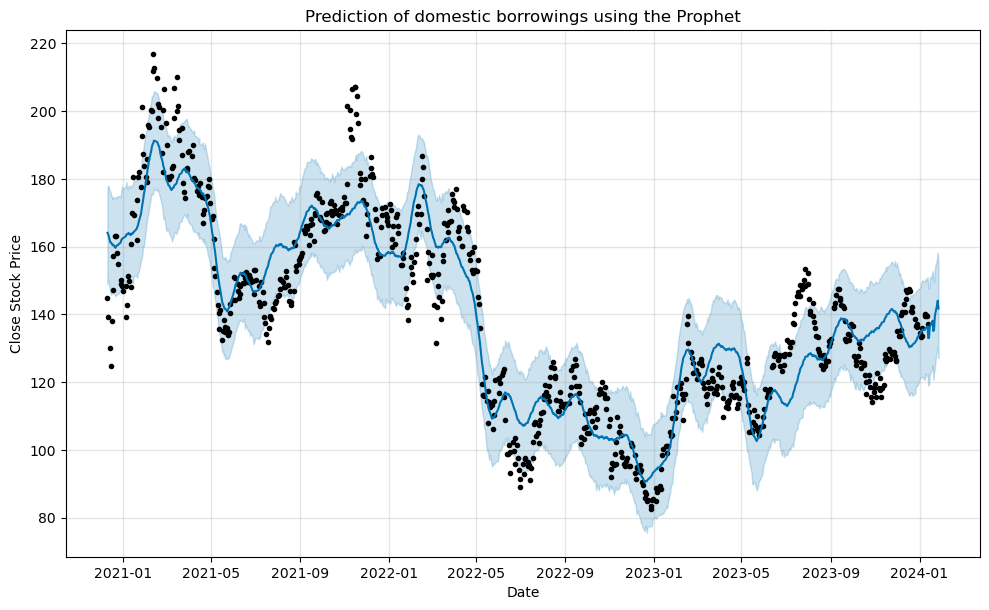

In [12]:
#Making predictions from the model
predictions = model_prop.predict(future_dates)
#predictions
model_prop.plot(predictions)
plt.title("Prediction of domestic borrowings using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

In [13]:
# Extract the relevant columns from predictions dataframe
predicted_values = predictions[['ds', 'yhat']]

# Filter the predicted values for the future dates (quarters)
future_predictions = predicted_values[predicted_values['ds'].dt.to_period('D').isin(future_dates['ds'].dt.to_period('Q'))]

# Rename the columns to appropriate names
future_predictions.columns = ['Date', 'Adj Close']

# Reset the index
future_predictions.reset_index(drop=True, inplace=True)

In [14]:
future_predictions

,Date,Adj Close


In [15]:
# Calculating mean absolute percentage error (MAPE)
mape = np.mean(np.abs((df['y'] - predictions['yhat']) /df['y'])) * 100
mape

6.35139913401072